In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
import dtale

In [19]:
houseprice = pd.read_csv('train.csv', index_col = 0)

In [20]:
model1=houseprice[["Neighborhood", "OverallQual", "YearBuilt", "YearRemodAdd", "RoofStyle", "Exterior1st", "Exterior2nd", "ExterQual", "Foundation", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "GrLivArea", "KitchenQual", "Fireplaces", "GarageArea", "SalePrice"]]

In [21]:
from sklearn.preprocessing import OneHotEncoder

#dummify Neighborhood column
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( model1[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
model1 = pd.concat( (model1.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )

# dummify RoofStyle column
RoofStyle_ohe = OneHotEncoder( drop='first', sparse = False )
RoofStyle_enc = RoofStyle_ohe.fit_transform( model1[['RoofStyle']] )
RoofStyle_enc = pd.DataFrame( RoofStyle_enc, columns=RoofStyle_ohe.get_feature_names(['RoofStyle']) )
model1 = pd.concat( (model1.drop(["RoofStyle"], axis=1).reset_index(drop = True), RoofStyle_enc), axis = 1 )

#dummify ExterQual Column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( model1[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
model1 = pd.concat( (model1.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )

#dummify Exterior1st Column
Exterior1st_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior1st_enc = Exterior1st_ohe.fit_transform( model1[['Exterior1st']] )
Exterior1st_enc = pd.DataFrame( Exterior1st_enc, columns=Exterior1st_ohe.get_feature_names(['Exterior1st']) )
model1 = pd.concat( (model1.drop(["Exterior1st"], axis=1).reset_index(drop = True), Exterior1st_enc), axis = 1 )

#dummify Exterior2nd Column
Exterior2nd_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior2nd_enc = Exterior2nd_ohe.fit_transform( model1[['Exterior2nd']] )
Exterior2nd_enc = pd.DataFrame( Exterior2nd_enc, columns=Exterior2nd_ohe.get_feature_names(['Exterior2nd']) )
model1 = pd.concat( (model1.drop(["Exterior2nd"], axis=1).reset_index(drop = True), Exterior2nd_enc), axis = 1 )


#dummify Foundation Column
Foundation_ohe = OneHotEncoder( drop='first', sparse = False )
Foundation_enc = Foundation_ohe.fit_transform( model1[['Foundation']] )
Foundation_enc = pd.DataFrame( Foundation_enc, columns=Foundation_ohe.get_feature_names(['Foundation']) )
model1 = pd.concat( (model1.drop(["Foundation"], axis=1).reset_index(drop = True), Foundation_enc), axis = 1 )

#dummify Heating QC Column
HeatingQC_ohe = OneHotEncoder( drop='first', sparse = False )
HeatingQC_enc = HeatingQC_ohe.fit_transform( model1[['HeatingQC']] )
HeatingQC_enc = pd.DataFrame( HeatingQC_enc, columns=HeatingQC_ohe.get_feature_names(['HeatingQC']) )
model1 = pd.concat( (model1.drop(["HeatingQC"], axis=1).reset_index(drop = True), HeatingQC_enc), axis = 1 )

# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( model1[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
model1 = pd.concat( (model1.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )

# dummify Fireplaces column
Fireplaces_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" ) #for integers
Fireplaces_enc = Fireplaces_ohe.fit_transform( model1[['Fireplaces']] )
Fireplaces_enc = pd.DataFrame( Fireplaces_enc, columns=Fireplaces_ohe.get_feature_names(['Fireplaces']) )
model1 = pd.concat( (model1.drop(["Fireplaces"], axis=1).reset_index(drop = True), Fireplaces_enc), axis = 1 )


In [22]:
model1["SalePrice_log"] = np.log(model1["SalePrice"])

model1

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,SalePrice,...,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,SalePrice_log
0,7,2003,2003,706,0,150,856,1710,548,208500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.247694
1,6,1976,1976,978,0,284,1262,1262,460,181500,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,12.109011
2,7,2001,2002,486,0,434,920,1786,608,223500,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12.317167
3,7,1915,1970,216,0,540,756,1717,642,140000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,11.849398
4,8,2000,2000,655,0,490,1145,2198,836,250000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0,0,953,953,1647,460,175000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,12.072541
1456,6,1978,1988,790,163,589,1542,2073,500,210000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12.254863
1457,7,1941,2006,275,0,877,1152,2340,252,266500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12.493130
1458,5,1950,1996,49,1029,0,1078,1078,240,142125,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.864462


In [25]:
y = model1[["SalePrice_log"]]
X = model1.drop(["SalePrice", "SalePrice_log"], axis=1)
print(X.shape)
print(y.shape)
#X.columns

(1460, 85)
(1460, 1)


In [26]:
np.random.seed(0)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X,y, test_size = 0.2  )

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xtrain = pd.DataFrame( ss.fit_transform( Xtrain ), columns = Xtrain.columns )

Xtrain.head()

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,Neighborhood_Blueste,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3
0,2.131506,1.188032,1.078914,-0.901062,-0.291823,2.757198,1.865729,0.601886,1.434743,-0.041416,...,-0.18338,-0.449050,-0.029273,-0.643462,-0.167836,1.236179,-1.020763,1.112451,-0.292407,-0.050746
1,-0.794852,-0.292501,-1.097548,-1.011427,-0.291823,0.745229,-0.387262,-1.216718,-0.791166,-0.041416,...,-0.18338,2.226922,-0.029273,-0.643462,-0.167836,-0.808944,0.979659,-0.898916,-0.292407,-0.050746
2,-0.794852,-1.641431,1.030548,0.627953,-0.291823,-0.926076,-0.430962,-1.080420,-0.198864,-0.041416,...,-0.18338,-0.449050,-0.029273,-0.643462,-0.167836,-0.808944,0.979659,-0.898916,-0.292407,-0.050746
3,1.399917,1.023528,0.837085,1.789085,-0.291823,-0.498533,1.249070,0.331238,1.831204,-0.041416,...,-0.18338,-0.449050,-0.029273,-0.643462,-0.167836,1.236179,-1.020763,-0.898916,3.419891,-0.050746
4,0.668327,0.990627,0.837085,-1.011427,-0.291823,2.224484,1.183519,0.043065,1.764331,-0.041416,...,-0.18338,-0.449050,-0.029273,-0.643462,-0.167836,1.236179,-1.020763,1.112451,-0.292407,-0.050746


In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [29]:
lasso = Lasso()

params = {'alpha':(0.0001, 100000), 'fit_intercept':[True]}
grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params )
grid_search_lasso.fit(Xtrain,ytrain)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': (0.0001, 100000), 'fit_intercept': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid_search_lasso.best_params_

{'alpha': 0.0001, 'fit_intercept': True}

In [31]:
grid_search_lasso.best_score_#squared_R

0.8749264805874101

In [33]:
lasso = Lasso(alpha=.0001)
lasso.fit(Xtrain, ytrain).coef_
print(grid_search_lasso.cv_results_)

{'mean_fit_time': array([0.02425122, 0.0034097 ]), 'std_fit_time': array([0.01004527, 0.00033009]), 'mean_score_time': array([0.00348306, 0.00176795]), 'std_score_time': array([0.00117972, 0.00023868]), 'param_alpha': masked_array(data=[0.0001, 100000],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_fit_intercept': masked_array(data=[True, True],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001, 'fit_intercept': True}, {'alpha': 100000, 'fit_intercept': True}], 'split0_test_score': array([ 0.85176452, -0.00130903]), 'split1_test_score': array([ 0.87754079, -0.0127815 ]), 'split2_test_score': array([ 0.89553367, -0.0081141 ]), 'mean_test_score': array([ 0.87492648, -0.00739633]), 'std_test_score': array([0.01796772, 0.00471199]), 'rank_test_score': array([1, 2], dtype=int32)}


In [58]:
#Running Lasso on test dataset
#lasso = Lasso(alpha=.0001)
#lasso.fit(Xtest, ytest).coef_
#grid_search_lasso.best_score_

In [34]:
lasso.fit(Xtrain, ytrain).coef_
lst = []
for i in (list(zip(lasso.fit(Xtrain, ytrain).coef_, Xtrain.columns))):
    lst.append(i)
lst

[(0.09208522105904299, 'OverallQual'),
 (0.01816314381181816, 'YearBuilt'),
 (0.03774743562462594, 'YearRemodAdd'),
 (0.039423025667768063, 'BsmtFinSF1'),
 (0.012177840784761406, 'BsmtFinSF2'),
 (-0.0, 'BsmtUnfSF'),
 (0.03401025308616458, 'TotalBsmtSF'),
 (0.12064878888157095, 'GrLivArea'),
 (0.044875253524846594, 'GarageArea'),
 (-0.003989863120488838, 'Neighborhood_Blueste'),
 (-0.019135761619130658, 'Neighborhood_BrDale'),
 (0.004206514649550373, 'Neighborhood_BrkSide'),
 (0.01655368079565943, 'Neighborhood_ClearCr'),
 (0.010888433362754135, 'Neighborhood_CollgCr'),
 (0.026605021784003015, 'Neighborhood_Crawfor'),
 (-0.017233462480004784, 'Neighborhood_Edwards'),
 (0.011621524685870991, 'Neighborhood_Gilbert'),
 (-0.03092331442109788, 'Neighborhood_IDOTRR'),
 (-0.022079672679632227, 'Neighborhood_MeadowV'),
 (-0.004374516555672851, 'Neighborhood_Mitchel'),
 (-0.0031126756910434413, 'Neighborhood_NAmes'),
 (-0.0033222148988527405, 'Neighborhood_NPkVill'),
 (0.004364149539129672, 'Nei

In [36]:
lst.sort()
lst

[(-0.044624366916159314, 'KitchenQual_TA'),
 (-0.03092331442109788, 'Neighborhood_IDOTRR'),
 (-0.02840938559037958, 'Neighborhood_OldTown'),
 (-0.027882442984559656, 'KitchenQual_Gd'),
 (-0.022079672679632227, 'Neighborhood_MeadowV'),
 (-0.019771953092099233, 'KitchenQual_Fa'),
 (-0.019135761619130658, 'Neighborhood_BrDale'),
 (-0.018978896541136173, 'HeatingQC_TA'),
 (-0.017752962124745513, 'RoofStyle_Gable'),
 (-0.017331175695011976, 'Exterior1st_BrkComm'),
 (-0.017233462480004784, 'Neighborhood_Edwards'),
 (-0.014147804661968888, 'HeatingQC_Fa'),
 (-0.01382785334547044, 'ExterQual_Fa'),
 (-0.010130660814998778, 'RoofStyle_Hip'),
 (-0.009622628649327893, 'Exterior2nd_MetalSd'),
 (-0.00874631827374225, 'Exterior2nd_HdBoard'),
 (-0.00770306979085095, 'Exterior2nd_BrkFace'),
 (-0.007605260293996023, 'RoofStyle_Gambrel'),
 (-0.007074523225561344, 'Exterior2nd_Wd Shng'),
 (-0.0064057949307585495, 'HeatingQC_Gd'),
 (-0.00541624757530266, 'Neighborhood_Sawyer'),
 (-0.004526989845104606, 'Ne

In [37]:
lst.sort(reverse=True)
lst

[(0.12064878888157095, 'GrLivArea'),
 (0.09208522105904299, 'OverallQual'),
 (0.044875253524846594, 'GarageArea'),
 (0.039423025667768063, 'BsmtFinSF1'),
 (0.03774743562462594, 'YearRemodAdd'),
 (0.03401025308616458, 'TotalBsmtSF'),
 (0.028941636906224106, 'Exterior1st_MetalSd'),
 (0.028018650373183435, 'Exterior1st_HdBoard'),
 (0.026605021784003015, 'Neighborhood_Crawfor'),
 (0.025043393604190507, 'Exterior1st_BrkFace'),
 (0.02408090815333323, 'Fireplaces_2'),
 (0.023244729323380606, 'Neighborhood_NridgHt'),
 (0.022963596256755165, 'Foundation_CBlock'),
 (0.02238601361035569, 'Fireplaces_1'),
 (0.0202519239687702, 'Foundation_PConc'),
 (0.018343137990472356, 'Exterior1st_Plywood'),
 (0.01816314381181816, 'YearBuilt'),
 (0.01714944359482559, 'Neighborhood_NoRidge'),
 (0.01655368079565943, 'Neighborhood_ClearCr'),
 (0.016264655925481965, 'Exterior2nd_Wd Sdng'),
 (0.01613789191544352, 'Neighborhood_Somerst'),
 (0.015587960994331785, 'Exterior1st_VinylSd'),
 (0.014775679755392493, 'Neighb

In [38]:
## Tree Building
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()

In [41]:
tree_model.fit(Xtrain, ytrain)
train_error = (1 - tree_model.score(Xtrain, ytrain))
test_error = (1 - tree_model.score(Xtest, ytest))
print(train_error)
print(test_error)

#Test errors are higher than train errors

4.511647971083832e-05
12.078763890706488


In [44]:
#Random Forest

from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()

In [45]:
n_trees_range = range(30, 500, 10)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
    randomForest.set_params(n_estimators=n_trees, random_state=42, oob_score=True)
    randomForest.fit(Xtrain, ytrain)
    train_error2.append(1 - randomForest.score(Xtrain, ytrain))
    test_error2.append(1 - randomForest.score(Xtest, ytest))
    oob_error.append(1 - randomForest.oob_score_)

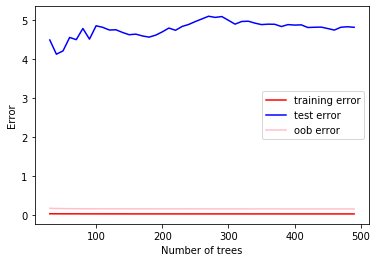

In [46]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

In [47]:
#Random Forest

randomForest.set_params(random_state=42, n_estimators=100, max_features=2)
randomForest.fit(Xtrain, ytrain) # fit 
randomForest.score(Xtrain, ytrain) # accuracy

0.9728752011336164

In [59]:
print("The training error of Random Forest is: %.5f" %(1 - randomForest.score(Xtrain, ytrain)))
print("The test     error of Random Forest is: %.5f" %(1 - randomForest.score(Xtest, ytest)))

The training error of Random Forest is: 0.02712
The test     error of Random Forest is: 1.81790


In [51]:
#Bagging
bagging.set_params(n_estimators=50, random_state=42, max_features=57)
bagging.fit(Xtrain, ytrain)
print("The training error of bagging forest is: %.5f" %(1 - bagging.score(Xtrain, ytrain)))
print("The test     error of bagging forest is: %.5f" %(1 - bagging.score(Xtest, ytest)))

The training error of bagging forest is: 0.02190
The test     error of bagging forest is: 4.00250


In [76]:
from sklearn.metrics import mean_squared_error
print("Test error is : {}".format(1- bagging.score(Xtest, ytest)))
mse=(mean_squared_error(ytest, bagging.predict(Xtest)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(ytest, bagging.predict(Xtest)))
print("Root Mean Squared Error: {}".format(rmse))

Test error is : 4.002495875867702
Mean Squared Error: 0.6059772427552111
Root Mean Squared Error: 0.7784454012679445


In [ ]:
## Test errors of bagging was much higher than random forest. 

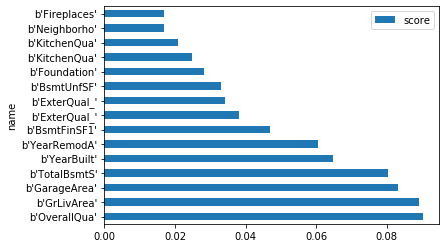

In [77]:
#Plot feature by importance

feature_importance = list(zip(Xtrain.columns[:-2], randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.barh(x='name', y='score')

In [62]:
print(randomForest.n_estimators)
randomForest.estimators_

#n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. 

100


[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1608637542, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1273642419, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fr

In [68]:
# from graphviz import Source
# from sklearn import tree
# from IPython.display import SVG
# treeIdx = 40 # has to be less than 50

# graph = Source(tree.export_graphviz(randomForest.estimators_[treeIdx], out_file=None, feature_names=Xtrain.columns[:57]))
# SVG(graph.pipe(format='svg'))

In [65]:
randomForest.set_params(oob_score=True, random_state=42)
randomForest.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [73]:
randomForest.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)>

In [75]:
from sklearn.metrics import mean_squared_error
print("Test error is : {}".format(1- randomForest.score(Xtest, ytest)))
mse=(mean_squared_error(ytest, randomForest.predict(Xtest)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(ytest, randomForest.predict(Xtest)))
print("Root Mean Squared Error: {}".format(rmse))

Test error is : 1.8179019069266935
Mean Squared Error: 0.27523006127272037
Root Mean Squared Error: 0.5246237330437123


In [66]:
randomForest.oob_score_

0.8080598566361269

In [ ]:
#Calculate RSME

In [ ]:
# #GridSearch to optimize the Tree

# from sklearn.model_selection import GridSearchCV
# import scipy
# scipy.test()
# grid_para_tree = [{
#      "criterion": ["gini", "entropy"],
#      "min_samples_leaf": range(1, 10),
#      "min_samples_split": np.linspace(start=1, stop=10, num=5, dtype=int)
#  }]
# #tree_model.set_params(random_state=10)
# grid_search_tree = GridSearchCV(tree_model, grid_para_tree, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search_tree.fit(Xtrain, ytrain)

In [ ]:
#select coefficients based on Lasso